<a href="https://colab.research.google.com/github/Saarle/Regression-Project/blob/main/Regression_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Regression Project**





In [519]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import warnings
import seaborn as sns
import re

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor , plot_tree

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
%matplotlib inline

def csv_drive_path_generatoer(url):
 '''
 Help in read csv file directly from google drive.
 Make sure the csv format is standard.
 url:str - path to csv file example:
   url = 'https://drive.google.com/file/d/126JPZ3lYwdLyJ2d_7jxM9jMtZaOlF-Ld/view?usp=sharing'
 return : str
 '''
 path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
 return path

In [466]:
# read the data
path = csv_drive_path_generatoer('https://drive.google.com/file/d/1R3vBFIn6YPrgpvyAADCY0yAYthaGy9NF/view?usp=sharing')
path_y = csv_drive_path_generatoer('https://drive.google.com/file/d/10wLZgOF00TY5Kmg0d_rn_agoEAFMVbwB/view?usp=sharing')
X = pd.read_csv(path)
y=  pd.read_csv(path_y)


In [467]:
# order the columns 
X.rename(columns = {"Unnamed: 0.1": "Id1",
                    "Unnamed: 0": "Id2",
                    "Education Level":"Education_Level",
                    "Job Title": "Job_Title",
                   "Years of Experience": "Years_of_Experience"},
                    inplace=True)

column_order =['id','Id1','Id2','Gender','Education_Level','Job_Title','Years_of_Experience','Country','Race','height','weight','professionalism']
X = X[column_order]

# **EDA**


In [469]:
# set id as index
data = X.join(y)
data.sort_values(by='id')

,id,Id1,Id2,Gender,Education_Level,Job_Title,Years_of_Experience,Country,Race,height,weight,professionalism,Unnamed: 0,Salary
417,0,0,0,NaN,bachelor,software|enginee,120.0,RazShmuelykingdom,NayaCollegegeek,2.492683,200.000000,160.0,0,90000.0
2839,1,1,1,NaN,master,data|analys,120.0,RazShmuelykingdom,NayaCollegegeek,2.480525,200.000000,84.0,1,65000.0
5076,4,4,4,M,master,directo,22.0,us,Asian,1.522019,105.799514,1040.0,4,200000.0
3739,5,5,5,M,bachelor,marketing|analys,4.0,us,Hispanic,1.949831,49.868702,58.0,5,55000.0
2351,6,6,6,F,master,product|manage,13.0,us,Asian,1.537399,87.847470,504.0,6,120000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,6697,6697,6697,F,master's|degr,senior|product|marketing|manage,20.0,u,White,2.271163,106.654680,969.0,6697,190000.0
689,6698,6698,6698,M,bachelor's|degr,junior|sales|representativ,7.0,canad,Asian,2.394349,73.157479,222.0,6698,75000.0
1872,6699,6699,6699,F,p,director|of|marketin,22.0,u,Mixed,1.642822,96.333417,980.0,6699,200000.0
2225,6702,6702,6702,M,master's|degr,marketing|manage,15.0,chin,Korean,2.238909,108.154402,644.0,6702,140000.0


In [491]:
for column in data.columns:
    column_description = data[column].describe()
    print(f"Description for {column}:\n{column_description}\n")

Description for Gender:
count     5355
unique       3
top          M
freq      2941
Name: Gender, dtype: object

Description for Education_Level:
count                5355
unique                  6
top       bachelor's|degr
freq                 1830
Name: Education_Level, dtype: object

Description for Job_Title:
count                 5355
unique                 173
top       software|enginee
freq                   423
Name: Job_Title, dtype: object

Description for Years_of_Experience:
count    5355.000000
mean        9.620448
std         6.077945
min         1.000000
25%         5.000000
50%         8.000000
75%        13.000000
max        36.000000
Name: Years_of_Experience, dtype: float64

Description for Country:
count     5355
unique       5
top         us
freq      1084
Name: Country, dtype: object

Description for Race:
count      5355
unique       10
top       White
freq       1588
Name: Race, dtype: object

Description for height:
count    5355.000000
mean        2.002327
std

In [ ]:
class DataPipeline:
    def __init__(self, data):
        self.data = data.copy() 
        

In [481]:
# check and drop duplicated columns 

def drop_duplicate_columns(data):
    columns_to_keep = data.T[~data.T.duplicated()].index

    return data[columns_to_keep]

data = drop_duplicate_columns(data)   

In [482]:
# set id as index
data.set_index('id' , inplace= True)
data.sort_values(by='id')

,Gender,Education_Level,Job_Title,Years_of_Experience,Country,Race,height,weight,professionalism,Salary
id,,,,,,,,,,
0,NaN,bachelor,software|enginee,120.0,RazShmuelykingdom,NayaCollegegeek,2.492683,200.000000,160.0,90000.0
1,NaN,master,data|analys,120.0,RazShmuelykingdom,NayaCollegegeek,2.480525,200.000000,84.0,65000.0
4,M,master,directo,22.0,us,Asian,1.522019,105.799514,1040.0,200000.0
5,M,bachelor,marketing|analys,4.0,us,Hispanic,1.949831,49.868702,58.0,55000.0
6,F,master,product|manage,13.0,us,Asian,1.537399,87.847470,504.0,120000.0
...,...,...,...,...,...,...,...,...,...,...
6697,F,master's|degr,senior|product|marketing|manage,20.0,u,White,2.271163,106.654680,969.0,190000.0
6698,M,bachelor's|degr,junior|sales|representativ,7.0,canad,Asian,2.394349,73.157479,222.0,75000.0
6699,F,p,director|of|marketin,22.0,u,Mixed,1.642822,96.333417,980.0,200000.0


In [486]:
# drop rows with nulls values 

def drop_na(data):
    # (data[data.isnull().any(axis=1)])
    data.dropna(inplace = True)

drop_na(data)

<Axes: >

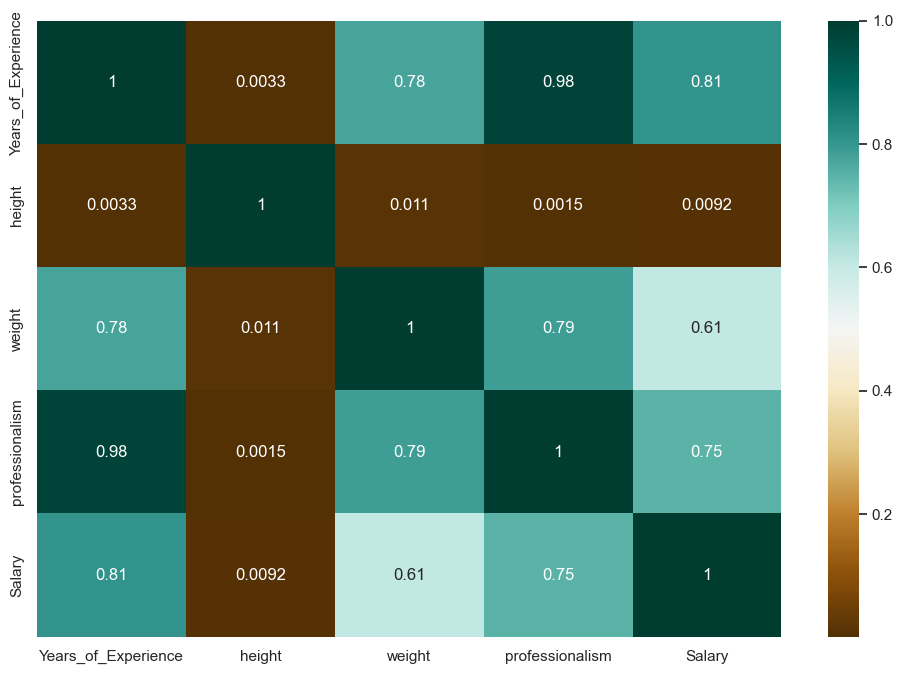

In [487]:
cor = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cor , annot= True,cmap='BrBG')

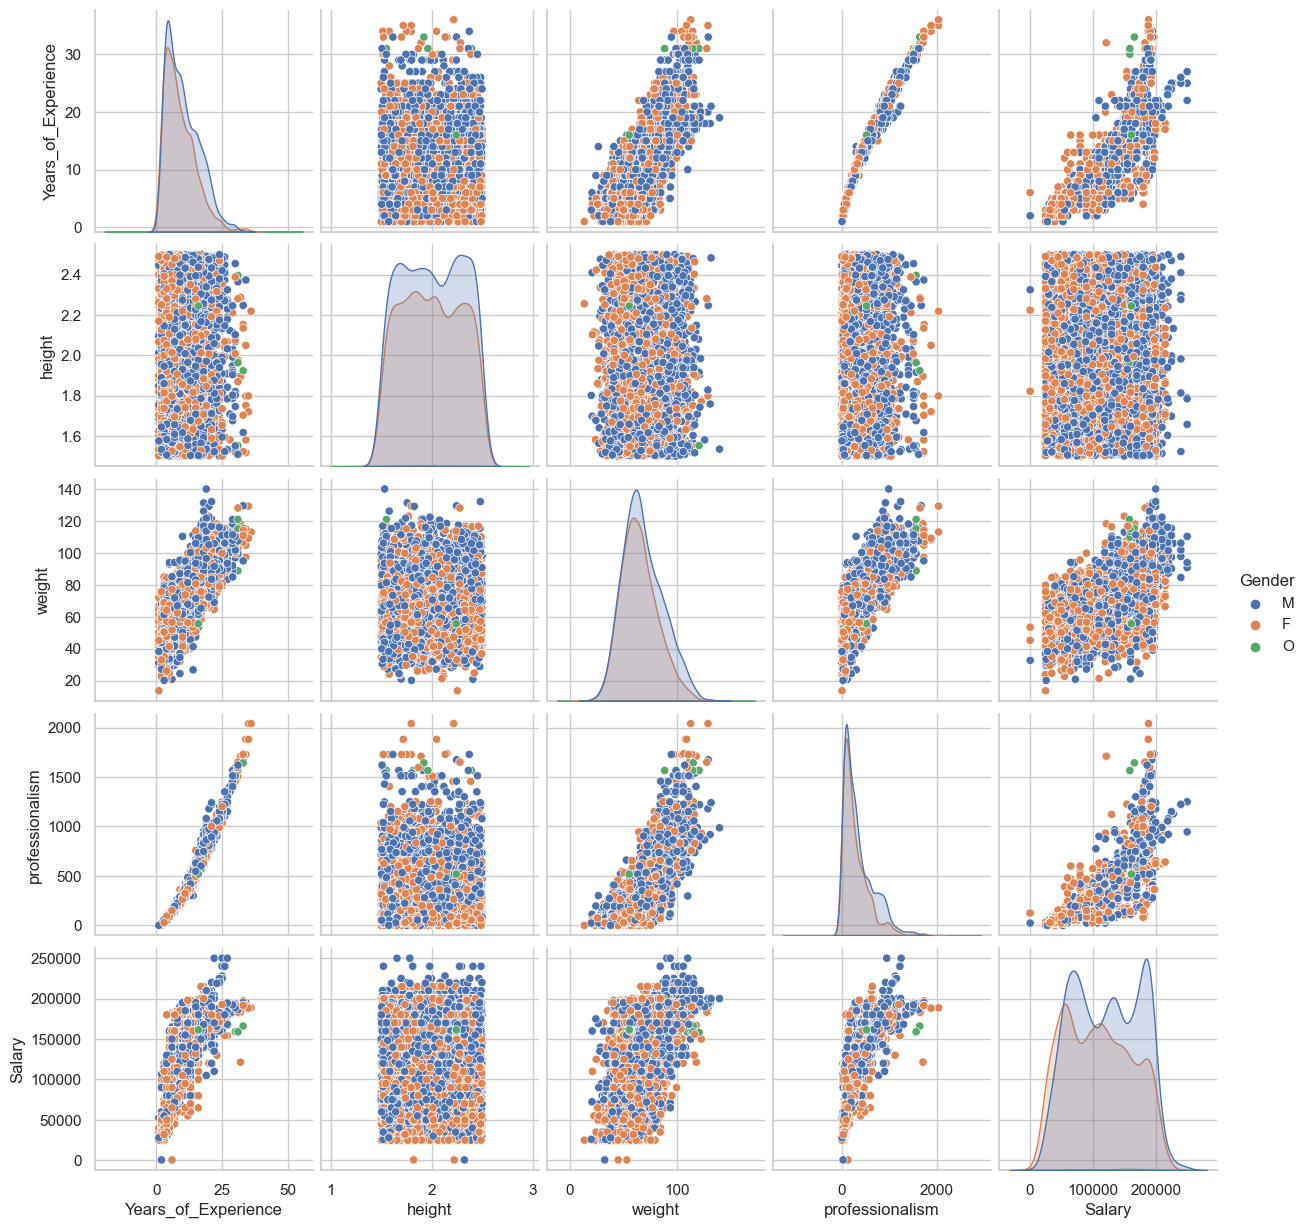

In [489]:
sns.pairplot(data,hue = 'Gender')

In [499]:
# check the sum od rows per gender
print(data.groupby('Gender').size())

# drop the gender O from the data
data = data.loc[data['Gender']!='O']

Gender
F    2402
M    2941
O      12
dtype: int64


<Figure size 800x600 with 0 Axes>

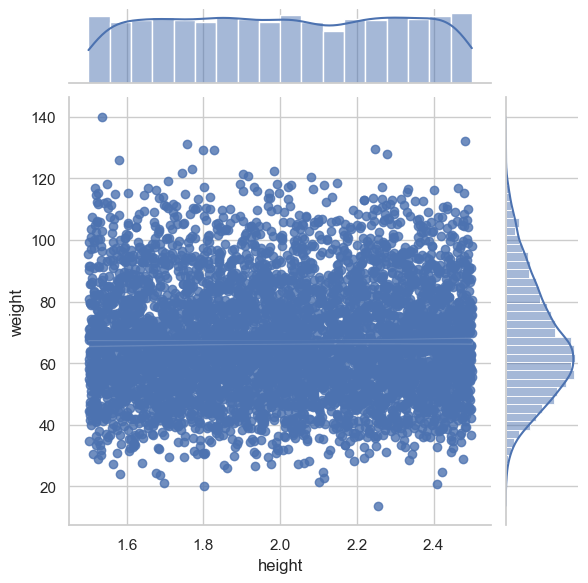

In [500]:
plt.figure(figsize=(8, 6))
sns.jointplot(x='height', y='weight', data=data, kind='reg')

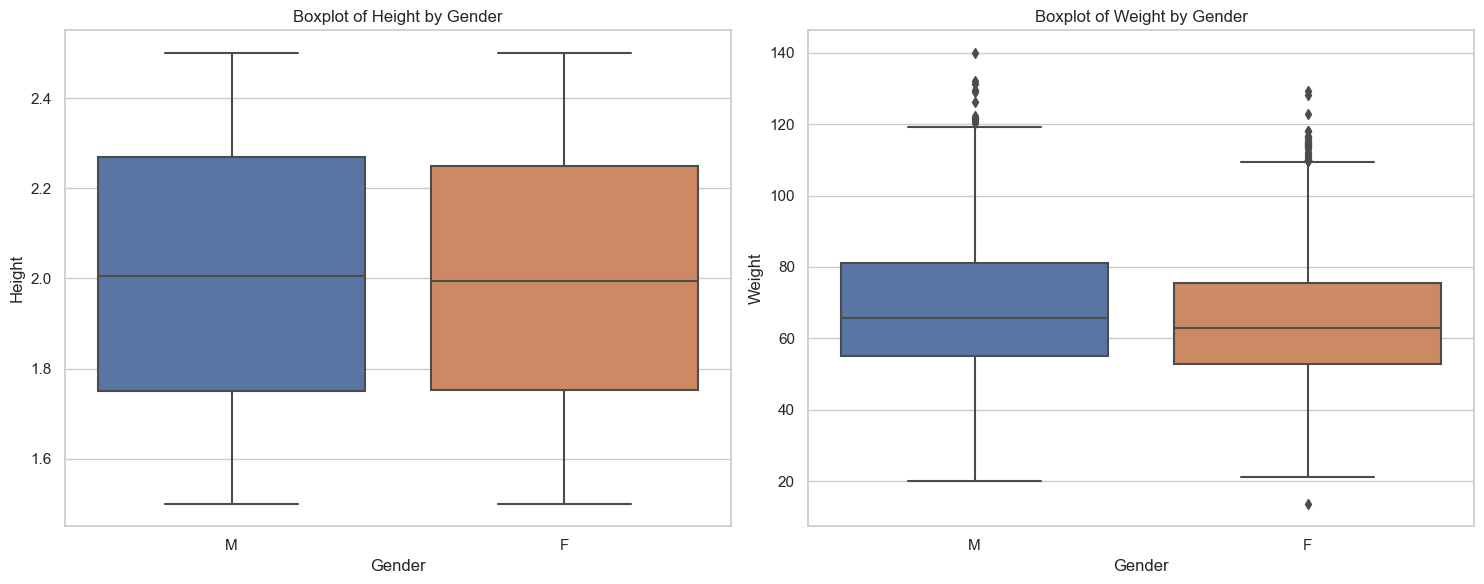

In [501]:
# Create two separate subplots for each box plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Create the first box plot for "height"
sns.boxplot(data=data, x="Gender", y="height", ax=axes[0])
axes[0].set_title('Boxplot of Height by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Height')

# Create the second box plot for "weight"
sns.boxplot(data=data, x="Gender", y="weight", ax=axes[1])
axes[1].set_title('Boxplot of Weight by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Weight')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

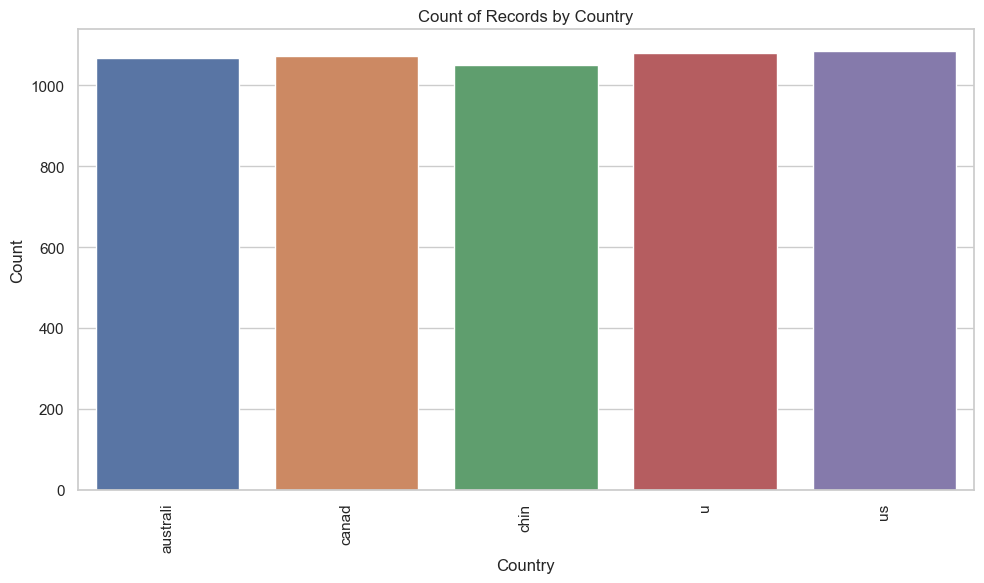

In [433]:
country = data.groupby('Country').size().reset_index(name='Count')

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=country, x='Country', y='Count')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Records by Country')
plt.tight_layout()

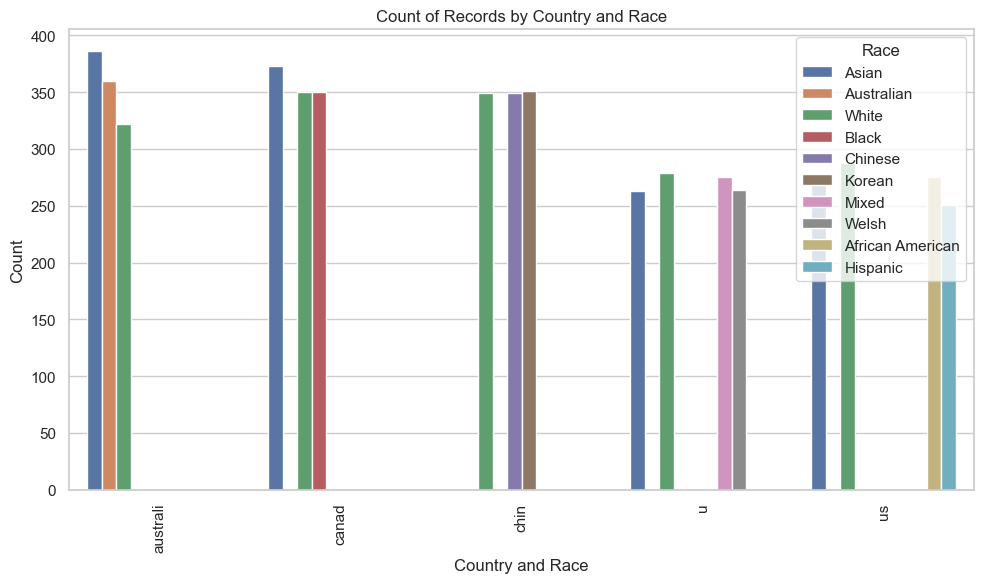

In [ ]:
country_race = data.groupby(['Country','Race']).size().reset_index(name='Count')

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=country_race, x='Country', y='Count',hue= 'Race')
plt.xticks(rotation=90)
plt.xlabel('Country and Race')
plt.ylabel('Count')
plt.title('Count of Records by Country and Race')
plt.tight_layout()

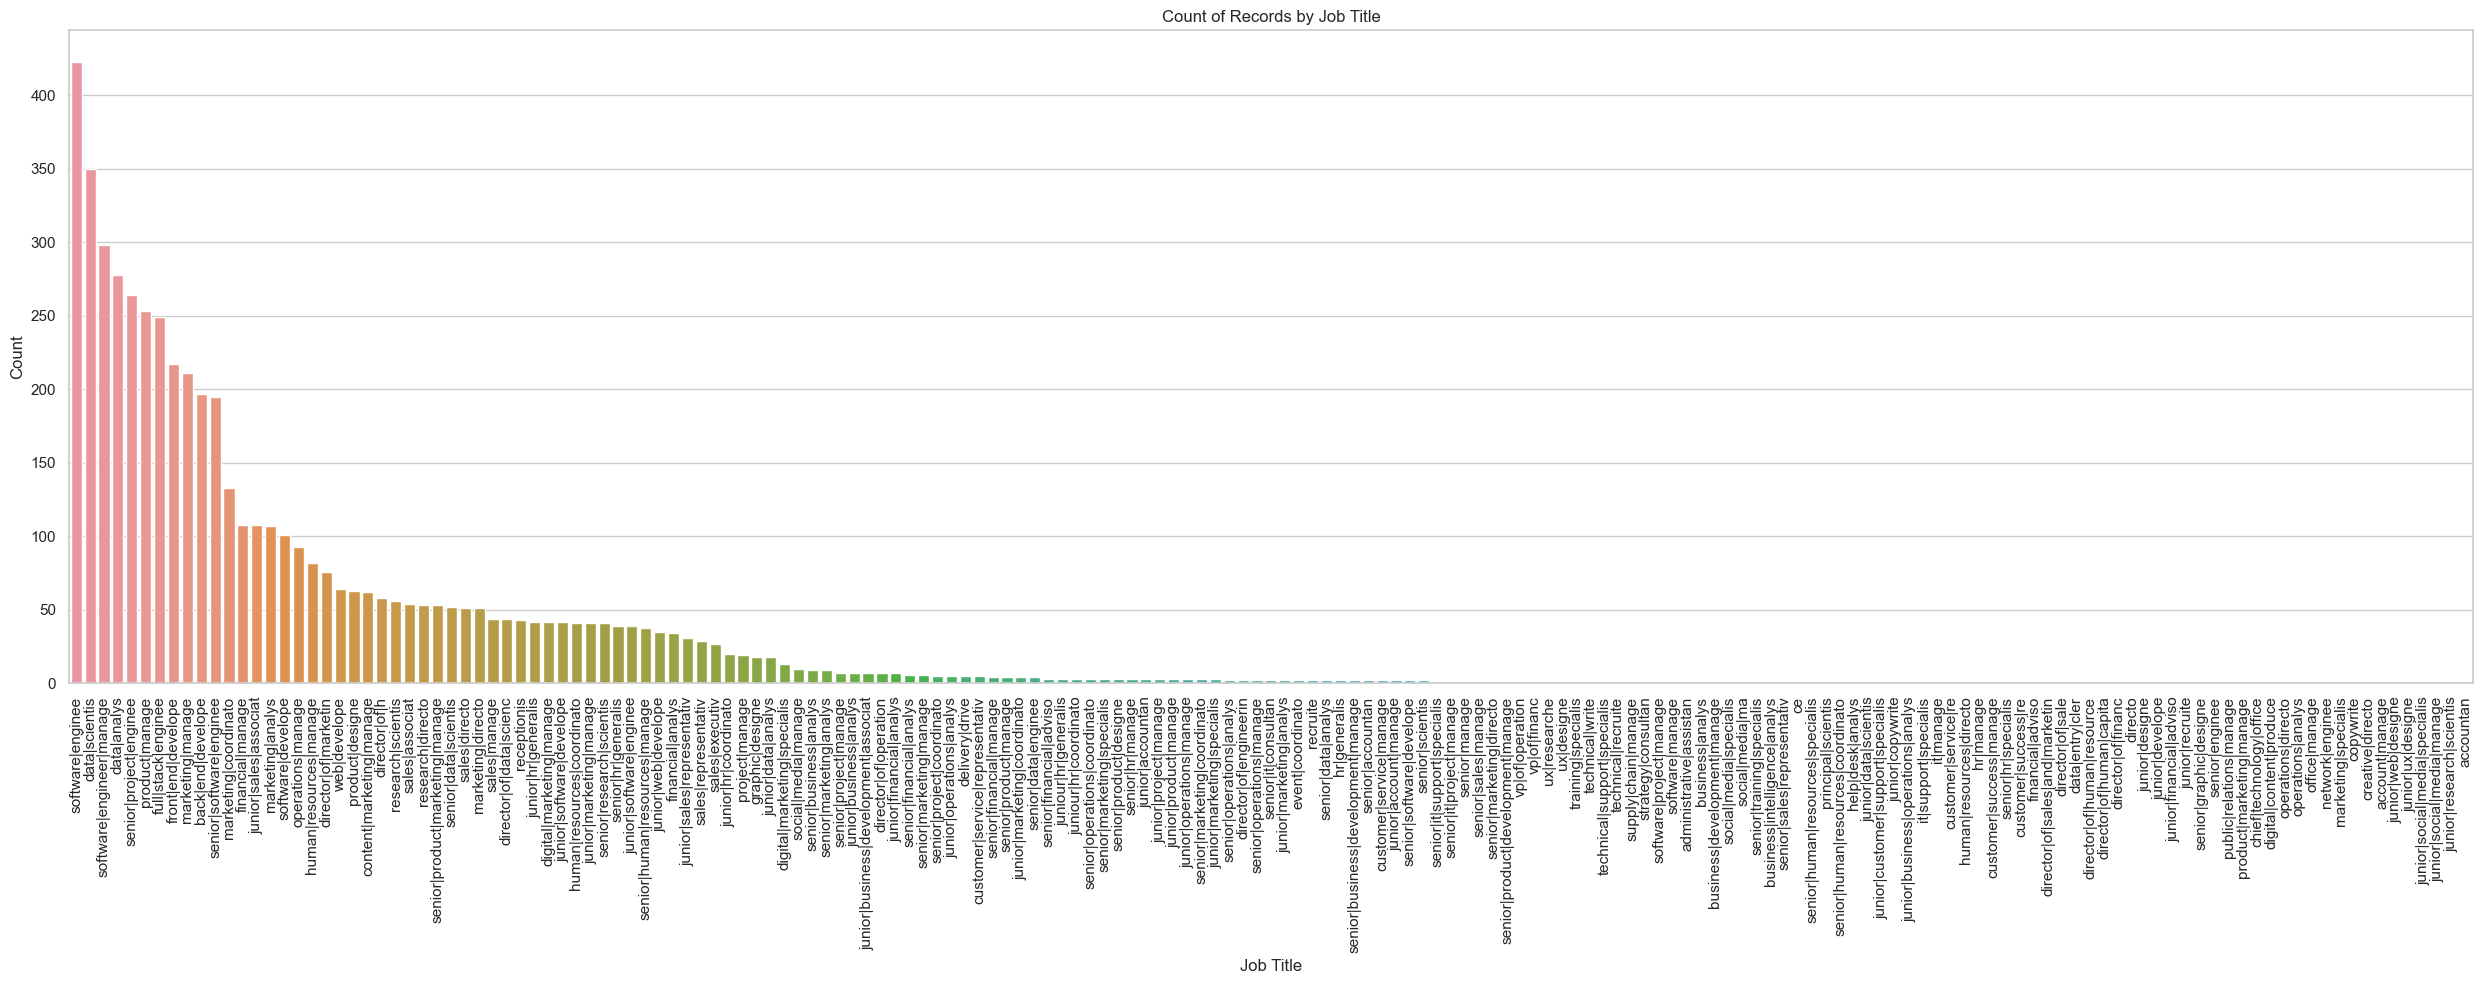

In [ ]:
job = data.groupby('Job_Title').size().reset_index(name='count').sort_values(by='count' ,ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(25, 10))
sns.barplot(data=job, x='Job_Title', y='count')
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Count of Records by Job Title')
plt.tight_layout()

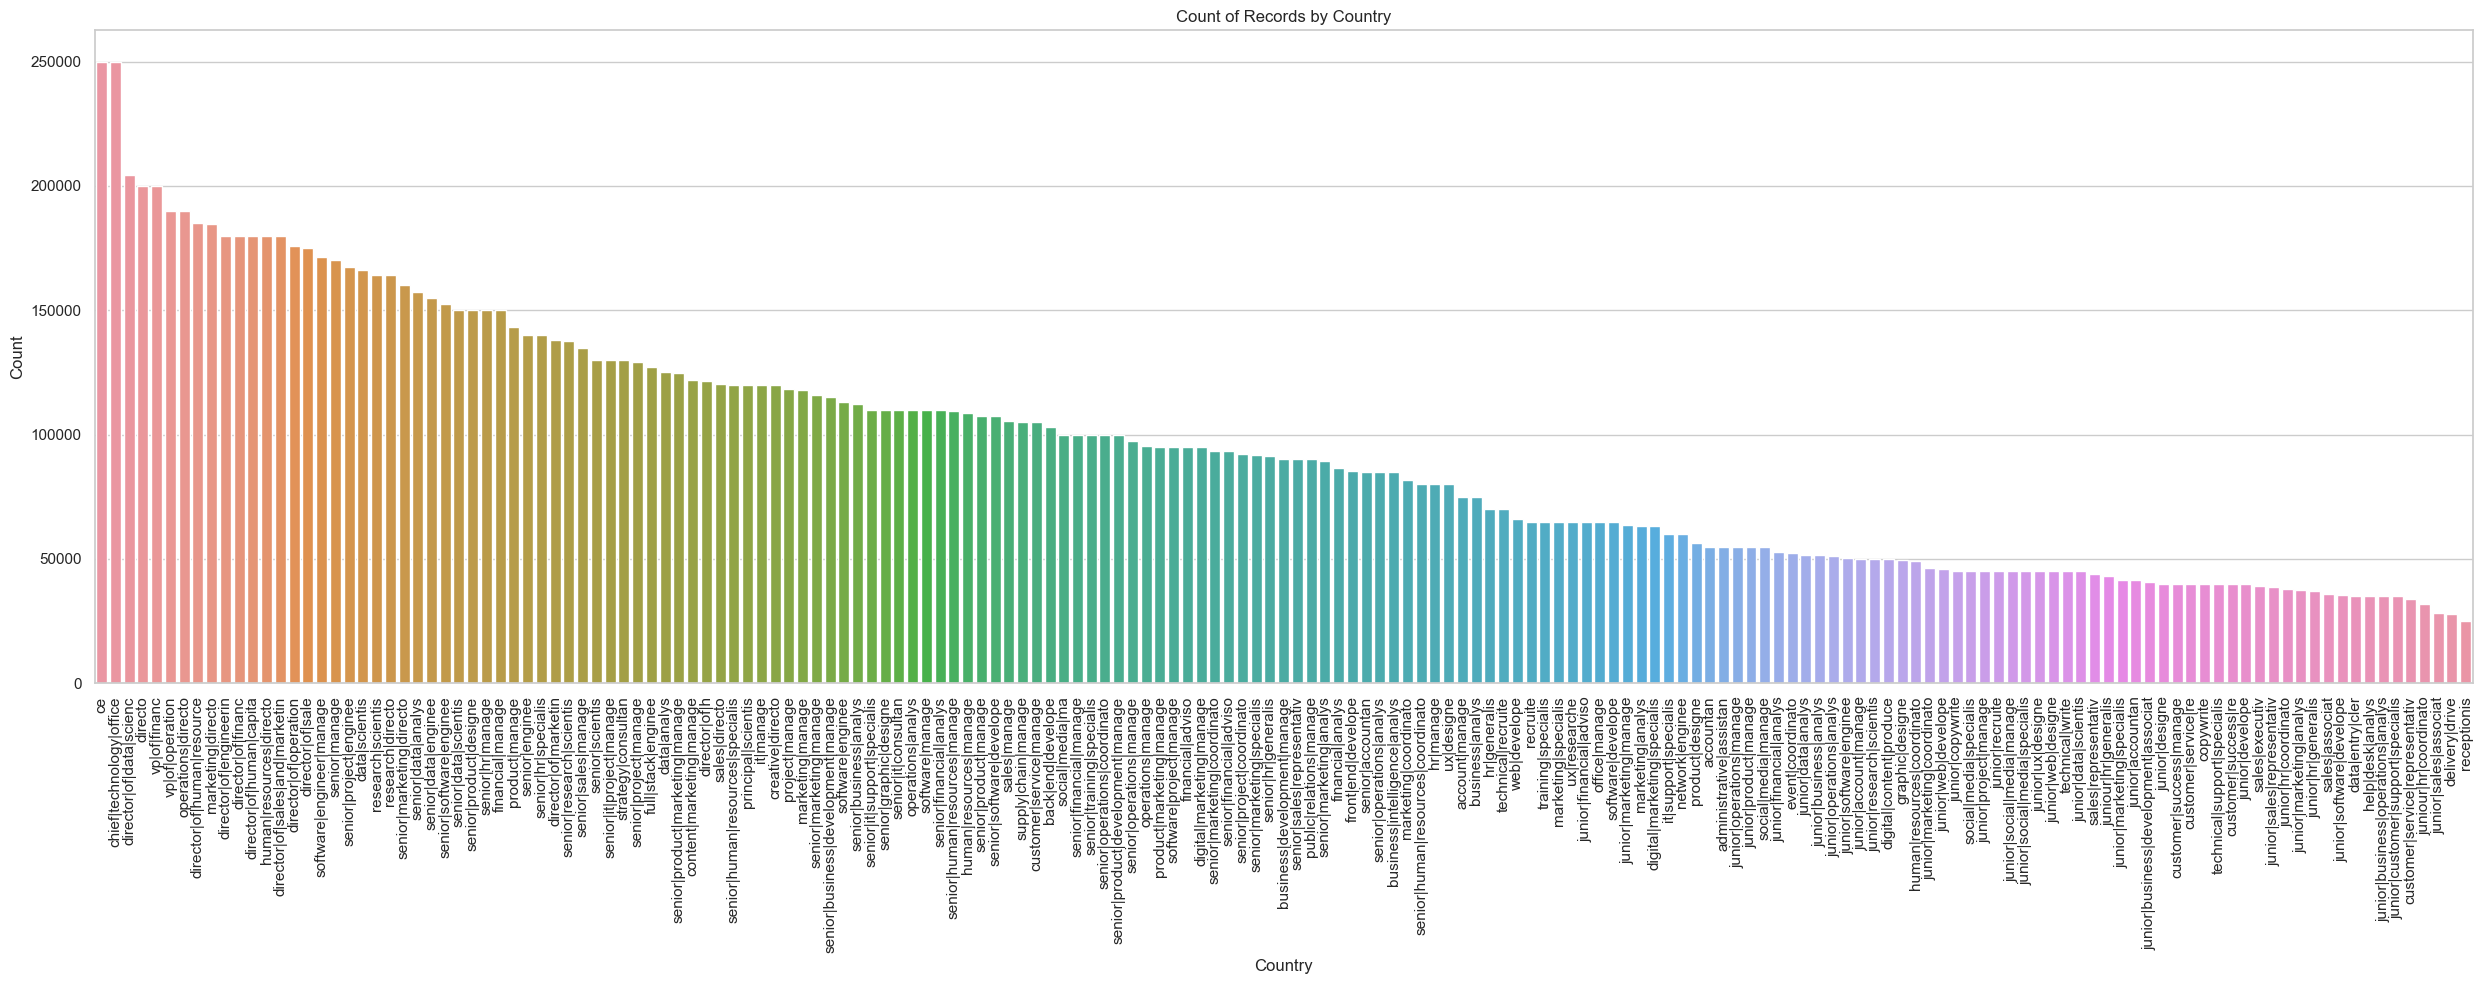

In [ ]:
job = data.groupby('Job_Title')['Salary'].mean().reset_index(name='mean').sort_values(by='mean' ,ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(25, 10))
sns.barplot(data=job, x='Job_Title', y='mean')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Records by Country')
plt.tight_layout()

# **Feature Engineering**

In [ ]:



def clean_similar_strings(column):
    similar_strings_mapping = {
        r"bachelor's\|degr": "bachelor",
        r"master's\|degr": "master",
        r"high\|scho": "high_school",

        
        # Add more patterns and replacements as needed
    }

    cleaned_values = []
    for value in column:
        if isinstance(value, str):  # Check if the value is a string
            for pattern, replacement in similar_strings_mapping.items():
                value = re.sub(pattern, replacement, value, flags=re.IGNORECASE)
        cleaned_values.append(value)

    return cleaned_values


data['Education_Level']= clean_similar_strings(data['Education_Level'])

data.Education_Level.unique()

array(['bachelor', 'master', 'p', 'high_school'], dtype=object)

In [ ]:
data.groupby('Education_Level').size().reset_index(name = 'count')


,Education_Level,count
0,bachelor,2431
1,high_school,337
2,master,1509
3,p,1078


In [504]:


def transform_column_with_encoder(data_frame, column_name):
    le = preprocessing.LabelEncoder()
    le.fit(data_frame[column_name])
    transformed_column = le.transform(data_frame[column_name])
    return transformed_column
   
def add_encoded_data(data_frame, column_name):
    transformed_data = transform_column_with_encoder(data_frame, column_name)

    data_frame['Transformed_' + column_name] = transformed_data

add_encoded_data(data, 'Gender')

data

,Gender,Education_Level,Job_Title,Years_of_Experience,Country,Race,height,weight,professionalism,Salary,Transformed_Job_Title,Transformed_Gender
id,,,,,,,,,,,,
2477,M,bachelor's|degr,back|end|develope,24.0,australi,Asian,1.800316,95.021957,1150.0,175966.0,3,1
76,F,bachelor,operations|manage,23.0,us,White,2.451414,87.456039,1100.0,160000.0,95,0
64,M,bachelor,junior|accountan,2.0,australi,Australian,1.917509,56.997108,26.0,35000.0,50,1
924,M,bachelor,data|analys,11.0,u,Welsh,2.160562,61.403169,279.0,195000.0,17,1
242,F,bachelor,senior|product|manage,11.0,chin,Korean,1.794105,72.049210,380.0,120000.0,142,0
...,...,...,...,...,...,...,...,...,...,...,...,...
354,F,bachelor,junior|business|development|associat,4.0,canad,Black,2.329507,64.070050,93.0,50000.0,53,0
3677,M,p,data|scientis,15.0,chin,White,1.945457,93.478548,546.0,140000.0,19,1
6032,M,high|scho,delivery|drive,1.0,canad,Asian,1.575751,38.216264,0.0,28000.0,20,1


### **Linear Regression Model**

In [528]:
X = data[['Years_of_Experience','professionalism','Transformed_Job_Title','Transformed_Gender']]
y = data.Salary



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the train data
y_pred_train = model.predict(X_train_scaled)

# Make predictions on the test data
y_pred_test = model.predict(X_test_scaled)

X_test['y_pred'] = y_pred_test
X_test['y'] = y_test

# Calculate RMSE
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# Print the RMSE
print("Train Root Mean Squared Error:", rmse_train)
print("Test Root Mean Squared Error:", rmse_test)

Train Root Mean Squared Error: 29147.193977938423
Test Root Mean Squared Error: 28205.18647379064


In [527]:
# Define features and target
X = data[['Years_of_Experience', 'professionalism', 'Transformed_Job_Title', 'Transformed_Gender']]
y = data.Salary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create linear regression, Ridge, and Lasso models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for Ridge
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter for Lasso

# Train the models on the training data
linear_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_test_linear = linear_model.predict(X_test_scaled)
y_pred_test_ridge = ridge_model.predict(X_test_scaled)
y_pred_test_lasso = lasso_model.predict(X_test_scaled)

# Calculate RMSE for linear regression
rmse_test_linear = mean_squared_error(y_test, y_pred_test_linear, squared=False)

# Calculate RMSE for Ridge regression
rmse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge, squared=False)

# Calculate RMSE for Lasso regression
rmse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso, squared=False)

print("Linear Root Mean Squared Error:",rmse_test_linear)
print("Ridge Root Mean Squared Error:",rmse_test_ridge)
print("Lasso Root Mean Squared Error:",rmse_test_lasso)

Linear Root Mean Squared Error: 28205.18647379064
Ridge Root Mean Squared Error: 28201.193831022723
Lasso Root Mean Squared Error: 28204.947876146536


<Figure size 640x480 with 0 Axes>

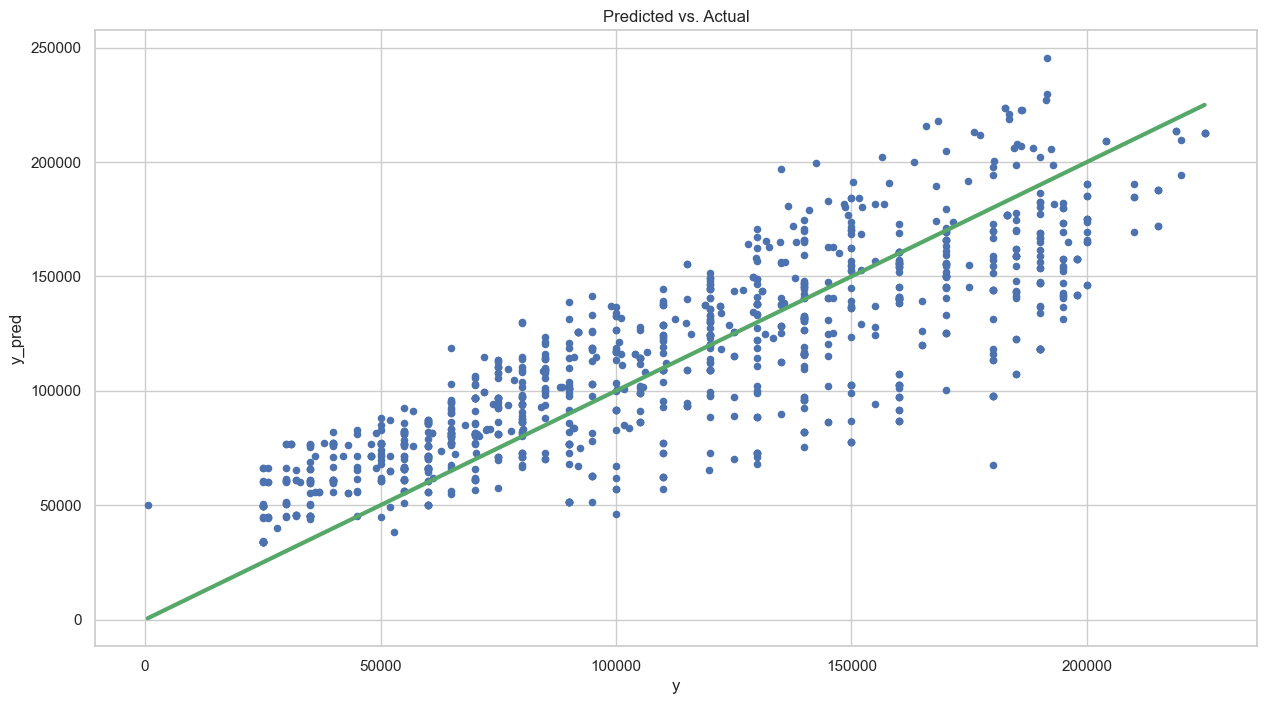

In [530]:
plt.figure()
amin, amax = min(X_test['y']), max(X_test['y'])
ax = X_test.plot('y', 'y_pred', kind='scatter',
                    #  xlim=[amin, amax], ylim=[amin, amax],
                     title='Predicted vs. Actual',
                     figsize = (15,8))
ax.plot(np.linspace(amin, amax, 2), np.linspace(amin, amax, 2),
        linewidth=3, color='g')                    

### **KNN Model**

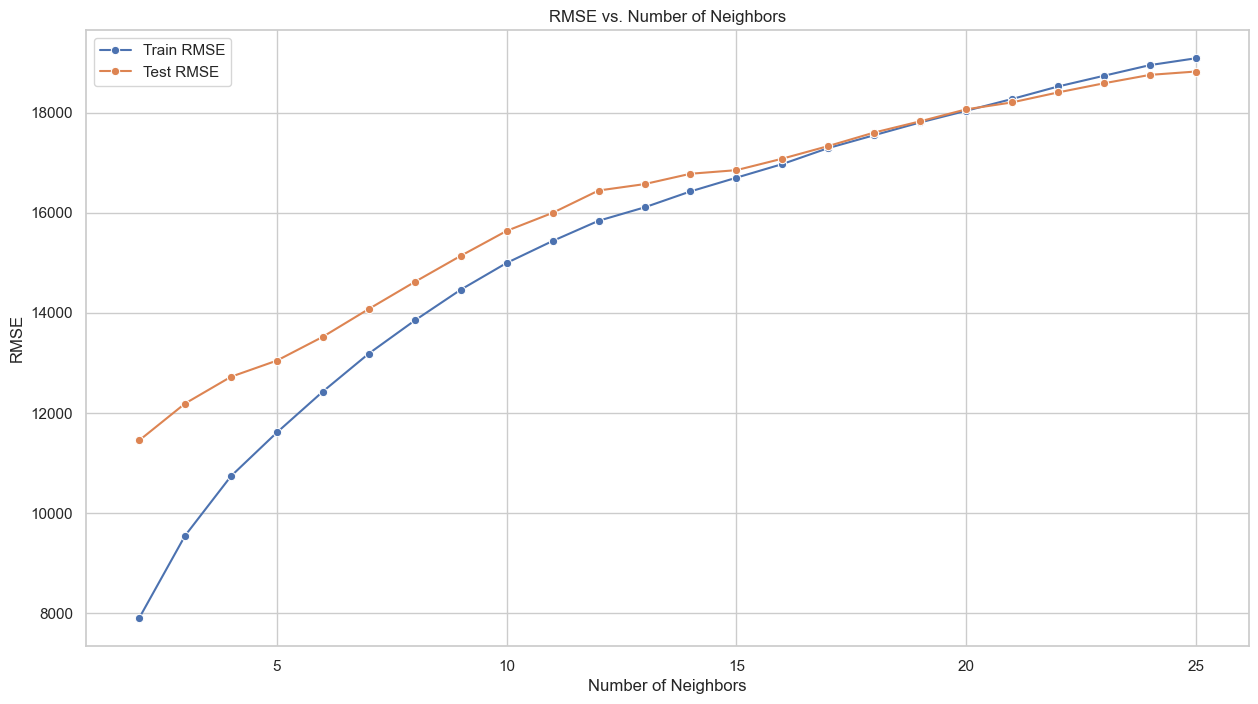

In [512]:


# Define features and target
X = data[['Years_of_Experience','professionalism','Transformed_Job_Title','Transformed_Gender']]
y = data.Salary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_neighbors= []
rmse_train_l = []
rmse_test_l = []

for i in range(2,26):

    # Create a KNeighborsRegressor model
    model = KNeighborsRegressor(n_neighbors=i)  # You can adjust the number of neighbors

    # Train the model on the training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the train data
    y_pred_train = model.predict(X_train_scaled)

    # Make predictions on the test data
    y_pred_test = model.predict(X_test_scaled)

    # Calculate RMSE
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

    n_neighbors.append(i) 
    rmse_train_l.append(rmse_train)
    rmse_test_l.append(rmse_test)

    # You can add the predicted salaries back to the DataFrame if needed
    # data['Predicted_Salary_knn'] = y_pred

    # Print the DataFrame with predicted salaries and RMSE

    # print("Root Mean Squared Error:", rmse)
   

plt.figure(figsize=(15, 8))
sns.lineplot(x=n_neighbors, y=rmse_train_l, marker='o', label='Train RMSE')
sns.lineplot(x=n_neighbors, y=rmse_test_l, marker='o', label='Test RMSE')
# plt.scatter(n_neighbors[np.argmin(rmse_test)], min(rmse_test), color='r', label=f'Min Test RMSE: {min(rmse_test):.2f}')
plt.title('RMSE vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.show()

### **Decision Tree Regressor Model**

Train Root Mean Squared Error: 21665.943761906838
Test Root Mean Squared Error: 21487.38069597424


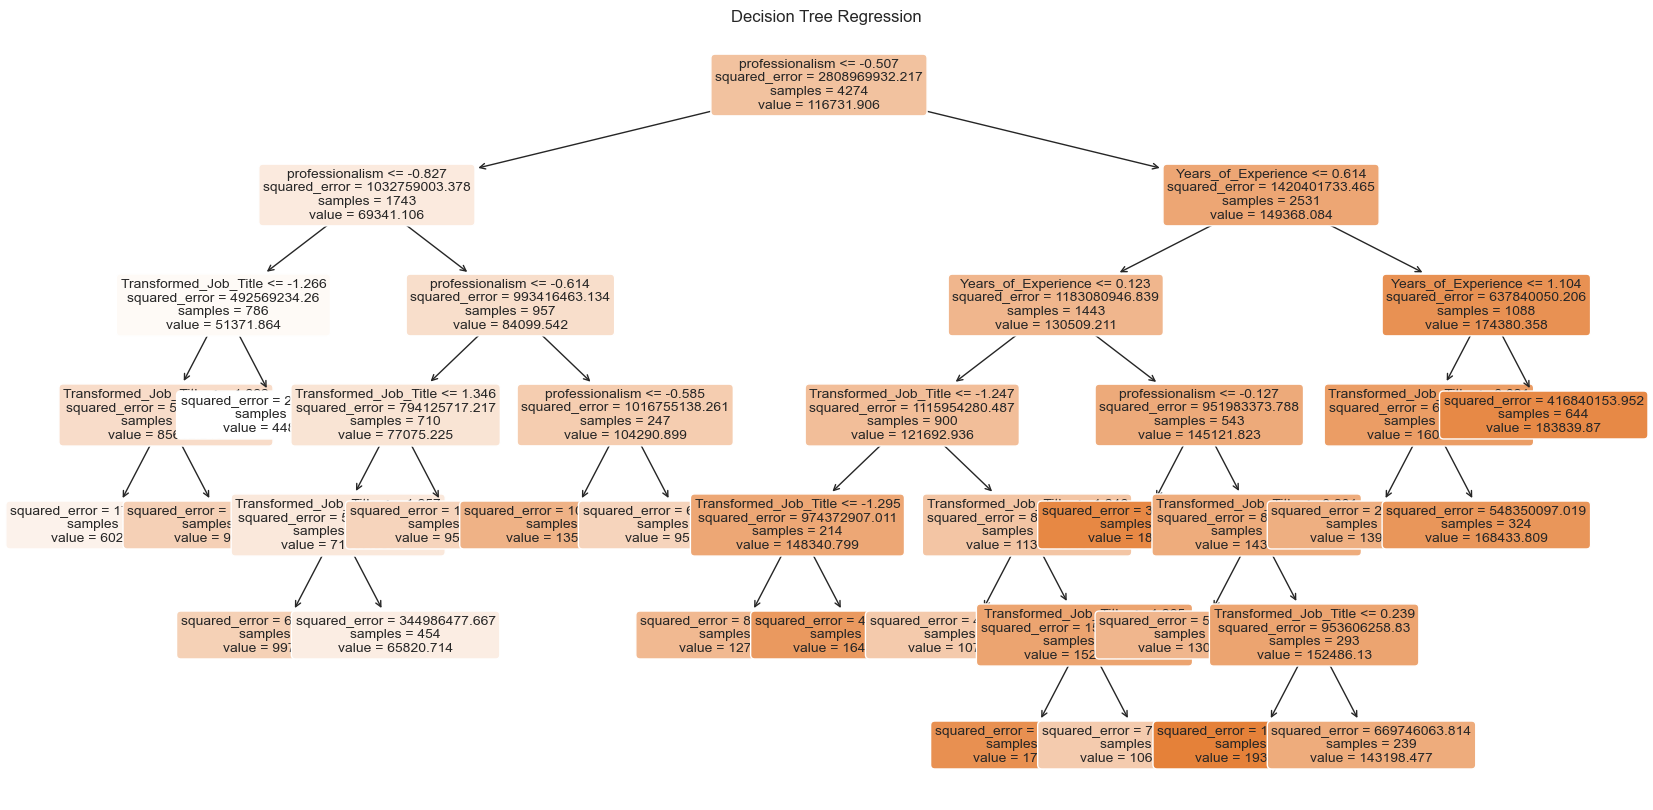

In [514]:


# Assuming you have loaded your data into the 'data' DataFrame

# Define features and target
X = data[['Years_of_Experience','professionalism','Transformed_Job_Title','Transformed_Gender']]
y = data.Salary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DecisionTreeRegressor model
model = DecisionTreeRegressor(max_leaf_nodes=20)  

# Train the model on the entire data
model.fit(X_train_scaled, y_train)

# Make predictions on the train data
y_pred_train = model.predict(X_train_scaled)

# Make predictions on the test data
y_pred_test = model.predict(X_test_scaled)

# Calculate RMSE
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# You can add the predicted salaries back to the DataFrame if needed
# data['Predicted_Salary'] = y_pred

# Print the RMSE
print("Train Root Mean Squared Error:", rmse_train)
print("Test Root Mean Squared Error:", rmse_test)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X_test.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Regression')
plt.show()
# data

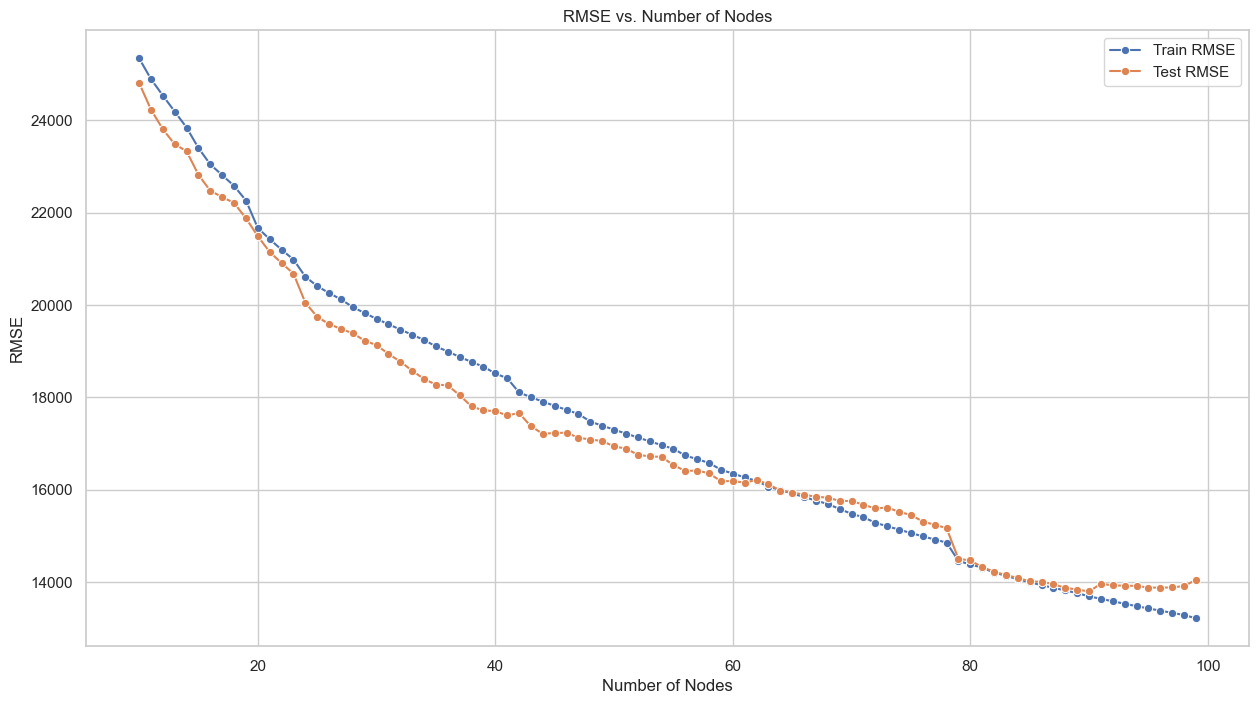

In [518]:
max_leaf_nodes= []
rmse_train_l = []
rmse_test_l = []

for i in range(10, 100):
    # Create a DecisionTreeRegressor model with varying max_leaf_nodes
    model = DecisionTreeRegressor(max_leaf_nodes=i)

    # Train the model on the training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the train data
    y_pred_train = model.predict(X_train_scaled)

    # Make predictions on the test data
    y_pred_test = model.predict(X_test_scaled)

    # Calculate RMSE for training and test sets
    rmse_train_i = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_test_i = mean_squared_error(y_test, y_pred_test, squared=False)

    max_leaf_nodes.append(i)
    rmse_train_l.append(rmse_train_i)
    rmse_test_l.append(rmse_test_i)

plt.figure(figsize=(15, 8))
sns.lineplot(x=max_leaf_nodes, y=rmse_train_l, marker='o', label='Train RMSE')
sns.lineplot(x=max_leaf_nodes, y=rmse_test_l, marker='o', label='Test RMSE')
plt.title('RMSE vs. Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.show()